In [1]:
# Importing Necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Importing Dataset
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [4]:
# iris.DESCR - It shows the description of the dataset
# iris.data  - It show the values of the dataset
# iris.feature_names - It shows the column names of the dataset
# iris.filename - It shows the complete path of this file
# iris.target - It shows the values of target column
# iris.target_names - It shows the target names

In [5]:
# Creating Dataframe with this dataset
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)

In [6]:
data.head(1)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2


In [7]:
# Adding the Target(Y) column in this dataframe
data['target (y)'] = iris.target

In [8]:
data.head(1)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target (y)
0,5.1,3.5,1.4,0.2,0


In [9]:
# Adding a new column of Flower Names
data['Flower Names'] = data['target (y)'].apply(lambda x:iris.target_names[x])

In [10]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target (y),Flower Names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


----

In [11]:
# Creating 3 different dataframes for each different flower
data1 = data[data['Flower Names'] == 'setosa']
data2 = data[data['Flower Names'] == 'versicolor']
data3 = data[data['Flower Names'] == 'virginica']

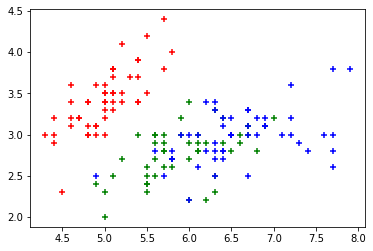

In [12]:
# Drawing the Scatter plot for 'sepal' length & width
plt.scatter(data1['sepal length (cm)'], data1['sepal width (cm)'], color='r', marker='+' )
plt.scatter(data2['sepal length (cm)'], data2['sepal width (cm)'], color='g', marker='+' )
plt.scatter(data3['sepal length (cm)'], data3['sepal width (cm)'], color='b', marker='+' );

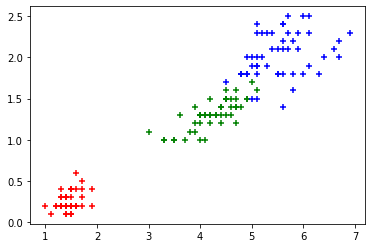

In [13]:
# Drawing the Scatter plot for 'petal' length & width
plt.scatter(data1['petal length (cm)'], data1['petal width (cm)'], color='r', marker='+' )
plt.scatter(data2['petal length (cm)'], data2['petal width (cm)'], color='g', marker='+' )
plt.scatter(data3['petal length (cm)'], data3['petal width (cm)'], color='b', marker='+' );

----

In [14]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target (y),Flower Names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [15]:
# Dividing the dataset into x and y
x = data.drop(['target (y)', 'Flower Names'], axis=1)
y = data['target (y)']

In [16]:
x.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [17]:
y.head(2)

0    0
1    0
Name: target (y), dtype: int32

In [18]:
# Splitting the whole dataset into training & testing datasets

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [19]:
# Shape of the Training & Testing sets
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(120, 4)
(120,)
(30, 4)
(30,)


----

In [20]:
# Training the model
from sklearn.svm import SVC
model = SVC(gamma='auto')                 # Creating the SVM classifier
model.fit(x_train, y_train)               # Fitting the training dataset

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [21]:
# Score of the model
model.score(x_test, y_test)

1.0

In [22]:
# Making Prediction ( for Test set result )
model.predict(x_test) # These are the predicted results (means y_predict) against x_test.

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

In [23]:
y_test               # These are the actual values against x_test.

114    2
62     1
33     0
107    2
7      0
100    2
40     0
86     1
76     1
71     1
134    2
51     1
73     1
54     1
63     1
37     0
78     1
90     1
45     0
16     0
121    2
66     1
24     0
8      0
126    2
22     0
44     0
97     1
93     1
26     0
Name: target (y), dtype: int32

In [24]:
# Making Prediction 1
model.predict([[0.1,0.1,0.1,0.1]])                # We have to put X in the form of 2-D array

array([2])

In [25]:
# Making Prediction 1
model.predict([[10,10,10,10]])                # We have to put X in the form of 2-D array

array([2])

----

#### Tuning the model

In [26]:
# Regularisation ( C = 1 )
from sklearn.svm import SVC
model_C = SVC(C=1)
model_C.fit(x_train, y_train)
model_C.score(x_test, y_test)

C:\Users\91999\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


1.0

In [27]:
# Regularisation ( C = 0.1 )
from sklearn.svm import SVC
model_C = SVC(C=0.1)
model_C.fit(x_train, y_train)
model_C.score(x_test, y_test)

C:\Users\91999\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.9666666666666667

In [28]:
# Kernel
from sklearn.svm import SVC
model_kernal = SVC(kernel='linear')
model_kernal.fit(x_train, y_train)
model_C.score(x_test, y_test)

0.9666666666666667